![](../img/575_banner.png)

# Lecture 8: Applications of Large Language Models 

UBC Master of Data Science program, 2024-25

> [Attention is all you need!](https://arxiv.org/pdf/1706.03762.pdf)

## Imports, LO

### Imports

In [1]:
import sys
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

import sys
import os
sys.path.append(os.path.join(os.path.abspath(".."), "code"))
from plotting_functions import *

pd.set_option("display.max_colwidth", 0)

<br><br>

### Learning outcomes

By the end of this lecture, you will 

- Understand real-world applications of LLMs
  
- Be able to use Hugging Face Transformers for common NLP tasks
- Understand when to use CLIP and RAG
- Be inspired to think about how these tools can help in your Capstone projects


<br><br><br><br>

## 1. Introduction to LLM applications 

### ❓❓ Questions for you

### Exercise 7.3: Select all of the following statements which are **True** (iClicker)
- (A) Decoder-only models are designed for text generation tasks.
  
- (B) Decoder-only models are trained using masked language modeling.
- (C) Encoder-only models are used for text understanding tasks (e.g., classification, NER).

- (D) Decoder-only models are trained using next-token prediction.

- (E) In an encoder-decoder architecture, the decoder generates tokens based on both previously generated tokens and encoder outputs.

<br><br><br><br>

```{admonition} Exercise 7.3: V's Solutions!
:class: tip, dropdown
- A, C, D, E
```

### Exercise 8.1: Which of the following are good use cases for LLMs? Select all that apply.

- (A) A chatbot to help students navigate a university website
  
- (B) Summarizing 1,000 open-text survey responses
- (C) Interpreting legal contracts to flag risky clauses
- (D) Providing medical diagnoses based on patient symptoms
- (E) Generating blog post drafts for a company website

<br><br><br><br>

### Exercise 8.2: Which of the following are good use cases for LLMs? Select all that apply. 

- (A) Extracting structured information from messy invoices
  
- (B) Answering questions based on current company policies
- (C) Debugging Python code for beginner programmers
- (D) Producing content for a scientific journal article
- (E) Generating creative writing prompts for students

<br><br><br><br>

**What are LLMs good at?**
- Generating human-like text
  
- Summarizing information
- Extracting structured data from unstructured text
- Understanding multimodal content (e.g., images + text)
- Supporting information retrieval

**Common application areas**

- Chatbots & virtual assistants
  
- Semantic search engines
- Content summarization & generation
- Code generation & debugging
- Knowledge base Q&A

**When should you avoid using LLMs or proceed with extreme caution?**
- When factual accuracy is critical: LLMs can hallucinate information or cite non-existent sources, which can lead to misinformation.
  
- In high-stakes applications with real-world consequences: LLMs often struggle with tasks that require a deep understanding of physical or causal reality, such as medical diagnoses or legal interpretations, and mistakes in these areas can have serious implications.

<img src="../img/hallucination1.png" width="500" height="500">

<img src="../img/hallucination2.png" width="500" height="500">

<br><br><br><br>

## 1. [🤗 Transformers library](https://huggingface.co/docs/transformers/index)
- The Hugging Face Transformers library is a popular open-source Python library for working with transformer models.
  
- It provides a wide range of pre-trained transformer models which have achieved top performance in many state-of-the-art NLP tasks.
  
- It provides 
    - an easy-to-use API that allows using these pre-trained models off-the-shelf for tasks such as text classification, question answering, named entity recognition, or machine translation.
      
    - an easy-to-use API that allows developers to fine-tune pre-trained transformer models on their own NLP tasks.
      
- The library includes tools for tokenization, model inference, training, and supports features such as model visualization, comparison, and sharing via the Hugging Face Model Hub.

- It supports both PyTorch and TensorFlow, offering a unified interface across frameworks.

- It's well-documented, actively maintained, and widely adopted in both research and industry, making it an excellent tool for NLP practitioners and researchers alike.

**Installation**

First, install the library if it's not already in your course environment. On the command line, activate the course environment and install the library. [Here](https://huggingface.co/docs/transformers/installation) you will find installation instructions. 
```
> conda activate 575
> pip install transformers
```

### 1.1 🤗 Transformers pipelines 

- Many NLP applications, such as sentiment analysis, text summarization, or translation, can be tackled with pre-trained models that work well out-of-the-box.
  
- An easiest way to get started with using pre-trained transformer models is using [pipelines](https://huggingface.co/docs/transformers/pipeline_tutorial) which abstracts many things away from the user. 

- 🤗 Transformers pipelines encapsulate the essential components needed for different tasks in a user-friendly interface.  

Let's create a `sentiment-analysis` pipeline using `distilbert-base-uncased-finetuned-sst-2-english` model. 

In [2]:
from transformers import pipeline

# Sentiment analysis pipeline
analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')
analyzer(["MDS cohort 9 is the best!",
          "I am happy that you will be graduating soon :).", 
          "But I am also sad that I won't be able to see you as much."])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998492002487183},
 {'label': 'POSITIVE', 'score': 0.9998409748077393},
 {'label': 'NEGATIVE', 'score': 0.9981827735900879}]

<br><br>

Let's create a `named-entity recognition` pipeline using `dbmdz/bert-large-cased-finetuned-conll03-english` model. 

In [3]:
# Load the named entity recognition pipeline
ner = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)

# Analyze a sentence
ner("Geoff Hinton was born in Wimbledon, London, England and worked at the University of Toronto.")

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/Users/kvarada/miniforge3/envs/575/lib/python3.12/site-packages/transformers/pipelines/token_classification.py:170: UserWarning:

`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.



[{'entity_group': 'PER',
  'score': 0.999501,
  'word': 'Geoff Hinton',
  'start': 0,
  'end': 12},
 {'entity_group': 'LOC',
  'score': 0.9946116,
  'word': 'Wimbledon',
  'start': 25,
  'end': 34},
 {'entity_group': 'LOC',
  'score': 0.9982844,
  'word': 'London',
  'start': 36,
  'end': 42},
 {'entity_group': 'LOC',
  'score': 0.9994216,
  'word': 'England',
  'start': 44,
  'end': 51},
 {'entity_group': 'ORG',
  'score': 0.9960832,
  'word': 'University of Toronto',
  'start': 70,
  'end': 91}]

<br><br>

### ❓❓ Questions for you

- What if you want the model to identify "Wimbledon, London, England" as one location instead of three separate locations?
  
- How could you approach this problem without retraining the model?

<br><br>

### 1.2 Model interpretation

One appealing aspect of transformer models is the ability to examine and interpret the attention weights, which can provide insights into how the model is processing input data. Why is this useful? 

- Helps us understand what the model focuses on when making predictions.
  
- Can reveal biases, spurious correlations, or surprising patterns.
- Builds trust, especially important in high-stakes domains (e.g., healthcare, law).

I'll show you examples of two tools 

- `transformers_interpret`: Useful for classification explanations
  
- `bertviz`: Helps understand internal model dynamics


Let's explore this by using the `transformers_interpret` tool to interpret the classification results.

> You'll have to [install the tool](https://github.com/cdpierse/transformers-interpret#install) in the course environment. 

In [4]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# With both the model and tokenizer initialized we are now able to get explanations on an example text.

from transformers_interpret import SequenceClassificationExplainer
cls_explainer = SequenceClassificationExplainer(
    model,
    tokenizer)
pos_word_attributions = cls_explainer("I am happy that you will be graduating soon :)")
pos_word_attributions

[('[CLS]', 0.0),
 ('i', 0.02094525471329689),
 ('am', 0.1985902190208435),
 ('happy', 0.9176833629608154),
 ('that', -0.25655069947242737),
 ('you', 0.08392918109893799),
 ('will', 0.08156903833150864),
 ('be', 0.05088721588253975),
 ('graduating', 0.056276895105838776),
 ('soon', 0.16000895202159882),
 (':', -0.08372053503990173),
 (')', 0.009795901365578175),
 ('[SEP]', 0.0)]

In [5]:
cls_explainer.visualize("distilbert_viz.html");

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,POSITIVE (1.00),POSITIVE,1.24,[CLS] i am happy that you will be graduating soon : ) [SEP]


In [6]:
neg_word_attributions = cls_explainer("But I am also sad that I won't be able to see you as much.")
neg_word_attributions

[('[CLS]', 0.0),
 ('but', 0.11202739924192429),
 ('i', -0.015052659437060356),
 ('am', 0.18965107202529907),
 ('also', 0.04398760944604874),
 ('sad', 0.3302032947540283),
 ('that', 0.2673846185207367),
 ('i', 0.1005408763885498),
 ('won', -0.12093047797679901),
 ("'", 0.1367592066526413),
 ('t', 0.22902138531208038),
 ('be', 0.07992967963218689),
 ('able', -0.13397061824798584),
 ('to', 0.10726834833621979),
 ('see', 0.19524820148944855),
 ('you', -0.06454735994338989),
 ('as', 0.5069112181663513),
 ('much', 0.45330682396888733),
 ('.', 0.3637690246105194),
 ('[SEP]', 0.0)]

In [7]:
cls_explainer.visualize("distilbert_viz.html");

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,NEGATIVE (1.00),NEGATIVE,2.78,[CLS] but i am also sad that i won ' t be able to see you as much . [SEP]


**Attention head visualization**

We can also visualize attention weights for different heads and different layers. 

In [8]:
from bertviz import head_view

from transformers import AutoTokenizer, AutoModel, utils
utils.logging.set_verbosity_error()  # Suppress standard warnings
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

inputs = tokenizer.encode("I am happy that you will be graduating soon 🎉", return_tensors='pt')
outputs = model(inputs)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens)

<IPython.core.display.Javascript object>

This is a visualization of the attention weights in Layer 0 of DistilBERT, for the input:
> I am happy that you will be graduating soon 🎉

- Left and right columns: Tokens in the input sentence (the left shows the token being queried, the right shows the token being attended to).
- Lines between them: Show how much attention each token (on the left) gives to other tokens (on the right).
- Colors: Represent different attention heads in that layer. There are 12 in this layer.

- "[CLS]" often attends broadly across the sentence, as it gathers information to produce a sentence-level representation (used for classification).
  
- Some attention heads spread their attention across all tokens, others are focused.


<br><br>

### 1.3 Zero-shot classification with pretrained transformer models

**Zero-shot** learning is when a model is asked to perform a task without seeing any labeled examples of that task during training.

Let's look at an example. 

The `sentiment-analysis` pipeline mentioned earlier is suitable for off-the-shelf sentiment analysis. But what if our aim is not sentiment analysis, but rather emotion classification? 
Suppose our goal is emotion classification, where we want to assign emotion labels like "joy", "anger", "fear", and "surprise" to text. For this task, we will utilize the emotion dataset loaded below, which contains English Twitter messages annotated with six basic emotions: _anger, fear, joy, love, sadness, and surprise_. For more detailed information please refer to [the paper](https://www.aclweb.org/anthology/D18-1404).

You could either do fine-tuning of a pre-trained model or use zero-shot classification. 

In [9]:
from datasets import load_dataset
dataset = load_dataset("dair-ai/emotion", download_mode="force_redownload")

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
dataset["train"][10]

{'text': 'i feel like i have to make the suffering i m seeing mean something',
 'label': 0}

In [11]:
dataset["train"]["text"][10]

'i feel like i have to make the suffering i m seeing mean something'

In [12]:
dataset["train"]["label"][10]

0

[Yin et al.](https://arxiv.org/abs/1909.00161) proposed that pre-trained Natural Language Inference (NLI) models can be used for zero-shot classifiers. Natural Language Inference (NLI), also known as textual entailment or simply inference, is a fundamental task in NLP that involves determining the logical relationship between two given pieces of text, typically referred to as the **premise** and the **hypothesis**. Here is an example: 

> Premise: "All MDS students worked diligently on their assignment."

> Hypothesis: "Most students in MDS received an A on the assignment."

In this case, based on reasoning abilities, a human would likely conclude the hypothesis above as a reasonable inference from the premise. A machine learning model trained on NLI data is designed to recognize such logical relationship and classify the pair as "entailment" or "contradiction". 

Yin et al.'s method works for zero-shot-classification by posing the sequence to be classified as the NLI premise. A hypothesis is created from each candidate label. For example, if we want to evaluate whether a sequence belongs to the class "joy", we could construct a hypothesis of "This text expresses joy." The probabilities for _entailment_ and _contradiction_ are then converted to label probabilities.
  
Let's classifying emotions with `zero-shot-classification` pipeline and `facebook/bart-large-mnli` model. In other words, get predictions from the pretrained model without any fine-tuning. 

> Refer to [the documentation](https://huggingface.co/tasks/zero-shot-classification). 

In [13]:
from transformers import AutoTokenizer
from transformers import pipeline 
import torch

#Load the pretrained model
model_name = "facebook/bart-large-mnli"
classifier = pipeline('zero-shot-classification', model=model_name)

In [14]:
exs = dataset["test"]["text"][:10]
candidate_labels = ["sadness", "joy", "love","anger", "fear", "surprise"]
outputs = classifier(exs, candidate_labels)

In [15]:
pd.DataFrame(outputs)

,sequence,labels,scores
0,im feeling rather rotten so im not very ambitious right now,"[sadness, anger, surprise, fear, joy, love]","[0.7367963194847107, 0.10041721910238266, 0.09770266711711884, 0.05880165845155716, 0.004266395699232817, 0.002015703357756138]"
1,im updating my blog because i feel shitty,"[sadness, surprise, anger, fear, joy, love]","[0.7429746985435486, 0.13775986433029175, 0.05828333646059036, 0.054218340665102005, 0.0050981491804122925, 0.0016656111693009734]"
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,"[love, sadness, surprise, fear, anger, joy]","[0.3153638243675232, 0.22490324079990387, 0.1902519166469574, 0.1365167498588562, 0.06732954829931259, 0.06563470512628555]"
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,"[surprise, joy, love, sadness, fear, anger]","[0.42182087898254395, 0.3336702883243561, 0.21740414202213287, 0.010598941706120968, 0.009764233604073524, 0.006741553079336882]"
4,i was feeling a little vain when i did this one,"[surprise, anger, fear, love, joy, sadness]","[0.5639430284500122, 0.17000176012516022, 0.08645128458738327, 0.07528384774923325, 0.06986623257398605, 0.03445376083254814]"
5,i cant walk into a shop anywhere where i do not feel uncomfortable,"[surprise, fear, sadness, anger, joy, love]","[0.37033382058143616, 0.36559492349624634, 0.14264902472496033, 0.09872639924287796, 0.01645739935338497, 0.006238458212465048]"
6,i felt anger when at the end of a telephone call,"[anger, surprise, fear, sadness, joy, love]","[0.9760521054267883, 0.01253431849181652, 0.003634259570389986, 0.0032386621460318565, 0.0029335422441363335, 0.0016070150304585695]"
7,i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia,"[surprise, joy, love, sadness, fear, anger]","[0.4382022023200989, 0.232231006026268, 0.1298600286245346, 0.07563057541847229, 0.0686710849404335, 0.05540511757135391]"
8,i like to have the same breathless feeling as a reader eager to see what will happen next,"[surprise, joy, love, fear, anger, sadness]","[0.7675782442092896, 0.13846899569034576, 0.03162870183587074, 0.029056400060653687, 0.02683253400027752, 0.006435163784772158]"
9,i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im about as fit as a walrus on vacation for the summer,"[surprise, sadness, anger, fear, joy, love]","[0.7340186834335327, 0.11860235780477524, 0.0745382308959961, 0.05806611105799675, 0.010977287776768208, 0.003797295968979597]"


<br><br>

## 2. In-context learning 

### 2.1 Prompting

- Up until recently, language models were only a component of a large system such as speech recognition system or machine translation system.
- Now they are becoming more capable of being a standalone system. 
- Language models are capable of conditional generation. So they are capable of generating completion given a prompt.  
$$\text{prompt} \rightarrow \text{completion}$$
- A prompt is a text string that a user issues to a language model to get to do something useful
- This simple interface lets us use language models for a variety of tasks by just changing the prompt. 
- Let's try a couple of prompts with the T5 encoder-decoder language model. 
- The following examples are based on the documentation [here](https://huggingface.co/docs/transformers/model_doc/t5).

In [16]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead

In [17]:
tokenizer = AutoTokenizer.from_pretrained('t5-base')
model = AutoModelWithLMHead.from_pretrained('t5-base', return_dict=True)

/Users/kvarada/miniforge3/envs/575/lib/python3.12/site-packages/transformers/models/auto/modeling_auto.py:1905: FutureWarning:

The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.



In [18]:
sequence = ('''
           A transformer is a deep learning model that adopts the mechanism of self-attention, 
           differentially weighting the significance of each part of the input data. 
           It is used primarily in the fields of natural language processing (NLP) and computer vision (CV).
           Like recurrent neural networks (RNNs), transformers are designed to process sequential input data, 
           such as natural language, with applications towards tasks such as translation and text summarization. 
           However, unlike RNNs, transformers process the entire input all at once. 
           The attention mechanism provides context for any position in the input sequence. 
           For example, if the input data is a natural language sentence, 
           the transformer does not have to process one word at a time. 
           This allows for more parallelization than RNNs and therefore reduces training times.
           
           Transformers were introduced in 2017 by a team at Google Brain and are increasingly the model of choice 
           for NLP problems, replacing RNN models such as long short-term memory (LSTM). 
           The additional training parallelization allows training on larger datasets. 
           This led to the development of pretrained systems such as BERT (Bidirectional Encoder Representations from Transformers) 
           and GPT (Generative Pre-trained Transformer), which were trained with large language datasets, 
           such as the Wikipedia Corpus and Common Crawl, and can be fine-tuned for specific tasks. 
           
           Before transformers, most state-of-the-art NLP systems relied on gated RNNs, 
           such as LSTMs and gated recurrent units (GRUs), with added attention mechanisms. 
           Transformers also make use of attention mechanisms but, unlike RNNs, do not have a recurrent structure. 
           This means that provided with enough training data, attention mechanisms alone can match the performance 
           of RNNs with attention.
           
           Gated RNNs process tokens sequentially, maintaining a state vector that contains 
           a representation of the data seen prior to the current token. To process the 
           nth token, the model combines the state representing the sentence up to token n-1 with the information 
           of the new token to create a new state, representing the sentence up to token n. 
           Theoretically, the information from one token can propagate arbitrarily far down the sequence, 
           if at every point the state continues to encode contextual information about the token. 
           In practice this mechanism is flawed: the vanishing gradient problem leaves the model's state at 
           the end of a long sentence without precise, extractable information about preceding tokens. 
           The dependency of token computations on the results of previous token computations also makes it hard 
           to parallelize computation on modern deep-learning hardware. This can make the training of RNNs inefficient.
           
           These problems were addressed by attention mechanisms. Attention mechanisms let a model draw 
           from the state at any preceding point along the sequence. The attention layer can access 
           all previous states and weigh them according to a learned measure of relevance, providing 
           relevant information about far-away tokens.
           
           A clear example of the value of attention is in language translation, where context is essential 
           to assign the meaning of a word in a sentence. In an English-to-French translation system, 
           the first word of the French output most probably depends heavily on the first few words of the English input. 
           However, in a classic LSTM model, in order to produce the first word of the French output, the model 
           is given only the state vector after processing the last English word. Theoretically, this vector can encode 
           information about the whole English sentence, giving the model all the necessary knowledge. 
           In practice, this information is often poorly preserved by the LSTM. 
           An attention mechanism can be added to address this problem: the decoder is given access to the state vectors of every English input word, 
           not just the last, and can learn attention weights that dictate how much to attend to each English input state vector.
            ''')

In [19]:
prompt = "summarize: "
inputs = tokenizer.encode(prompt + sequence, return_tensors="pt", max_length=512, truncation=True)

In [20]:
summary_ids = model.generate(inputs, max_length=150, min_length=80, length_penalty=5., num_beams=2)
summary_ids

tensor([[    0,     3,     9, 19903,    19,     3,     9,  1659,  1036,   825,
            24,  4693,     7,     8,  8557,    13,  1044,    18, 25615,     3,
             5,  9770,     3,    60, 14907, 24228,  5275,    41, 14151,   567,
             7,   201, 19903,     7,   433,     8,  1297,  3785,    66,    44,
           728,     3,     5,     8,  1388,  8557,   795,  2625,    21,   136,
          1102,    16,     8,  3785,  5932,     3,     5, 19903,     7,   130,
          3665,    16,  1233,    57,     3,     9,   372,    44, 10283,  2241,
             3,     5,     8,  1388,  8557,    19,  1126,    12,    24,    13,
             3,     9,     3,    60, 14907, 24228,  1229,    41, 14151,   567,
            61,     1]])

In [21]:
tokenizer.decode(summary_ids[0])

'<pad> a transformer is a deep learning model that adopts the mechanism of self-attention . unlike recurrent neural networks (RNNs), transformers process the entire input all at once . the attention mechanism provides context for any position in the input sequence . transformers were introduced in 2017 by a team at google brain . the attention mechanism is similar to that of a recurrent neural network (RNN)</s>'

<br><br>

Let's try translation with the same model. 

In [22]:
input_ids = tokenizer("translate English to German: The house is wonderful.", return_tensors="pt").input_ids
output = model.generate(input_ids)
output

tensor([[    0,   644,  4598,   229, 19250,     5,     1]])

In [23]:
tokenizer.decode(output[0])

'<pad> Das Haus ist wunderbar.</s>'

![](../img/basic-prompt-templates.png)

![](../img/llm-outputs-basic-prompts.png)
[Source](https://web.stanford.edu/~jurafsky/slp3/12.pdf)

- A prompt can also contain demonstrations, examples to help make the instructions clearer:
  
> Identify the emotion expressed in each of the following sentences.<br><br>
> Example:<br>
> **Input:** Studying the transformer architecture and all the matrices makes my head hurt.<br>
> **Output:** Overwhelmed 

- **Chain-of-thought** prompting is a simple yet powerful technique to help language models perform better on reasoning tasks.

- Just like humans solve complex problems by breaking them down into smaller steps, we can guide language models to do the same by including step-by-step reasoning in the examples we give them.

- In few-shot prompts, we don't just show question–answer pairs. Instead, we augment each example with intermediate reasoning steps. This encourages the model to generate similar reasoning for new tasks and leads to more accurate answers.

- You can add the phrase "Let's think step by step" to the prompt for chain-of-thought prompting. 

**❓❓ Questions for you**

Overall, language model performance can be significantly improved through effective prompting, for example, using few-shot learning or chain-of-thought prompting.

- **What's really happening when we optimize prompts?** Is the model learning in the traditional sense when we improve its performance through better prompts? Or is something else going on?
  
- Think about how this compares to training via gradient descent, when weights are updated versus when they're frozen. In prompt-based methods, are we modifying the model itself, or just changing how we interact with it?

<br><br><br><br>

## Course evaluations (~10 minutes)

The online course evaluations are up, it'll be great if you can fill them in when you get a chance: [Canvas](https://canvas.ubc.ca/courses/154208)

- We know you have busy scheduled and many evaluations to complete, but your feedback is valuable in improving our courses. 

- It'll be great to know what worked for you and what could be improved in this course. 

- Other than helping us in improving our courses and teaching style, they also play an important role in our careers, promotions etc.  

<br><br>

## 3. Some other useful things to know

- As we all know, LLMS are increasingly popular in industry. Now you know the fundamentals. But we haven't really talked about LLM applications. (I wish we had a few more lectures!)
  
- Below I'll show you a few tools which could be useful for you. 

There are also torch vision models. Check [this](https://huggingface.co/Qwen/Qwen2-VL-2B-Instruct) out. 

### 3.1: CLIP: Contrastive Language–Image Pre-training

CLIP learns to understand images and text by mapping them into a **shared embedding space**, so that **related image–text pairs lie close together**, and unrelated pairs are far apart.

The image below shows the schematic of CLIP. 

- Rows: Encoded images $I_1, I_2, \ldots, I_N$
- Columns: Encoded texts $T_1, T_2, \ldots, T_N$ (where each $T_j$ is a full caption or label like "a photo of a dog")
- Each cell: $I_i \cdot T_j \rightarrow$ the similarity between image $i$ and text $j$
- $I_1 \cdot T_1  \rightarrow$ the similarity between an image and its matching caption
- Off-diagonal cells (e.g., $I_1 \cdot T_3 $) are mismatched pairs: used as negative examples during contrastive training

The goal of the training is:
- To make $I_i \cdot T_i$ high for matching image-text pairs
- And $I_i \cdot T_j$ low when $i \ne j$

This helps the model learn to map matching images and texts close together in a shared embedding space.

![](../img/clip.png)

[Source](https://github.com/openai/CLIP)

**Zero-shot classification setup**

- Suppose we want to classify images into labels like "dog", "car", "plane", etc.
- Turn labels into **natural language prompts**, e.g.,  
  *"A photo of a dog"*, *"A photo of a plane"*
- Use the **Text Encoder** to encode each prompt into an embedding.

**Zero-shot prediction**

- At test time, encode a new image using the **Image Encoder**.
- Compare the image embedding with each text embedding using **cosine similarity**.
- The label with the most similar text embedding is chosen as the prediction.

- Note that we are not training the model on a specific classification task!

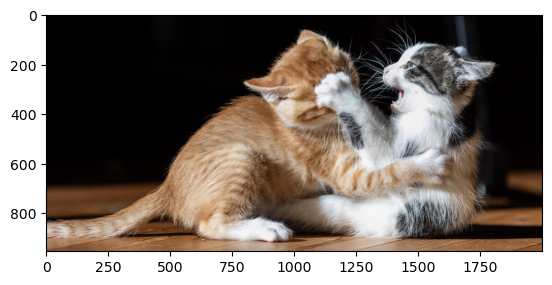

In [24]:
import clip
import torch
from PIL import Image


img = Image.open("../img/cats_playing.jpg")
plt.imshow(img);

In [25]:
model, preprocess = clip.load("ViT-B/32", device="cpu")
image = preprocess(Image.open("../img/cats_playing.jpg")).unsqueeze(0)
text = clip.tokenize(["A girl walking in the trails", "two cats playing", ])
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1)
probs

tensor([[1.6534e-08, 1.0000e+00]])

In [26]:
import seaborn as sns
import os

# Load model
device = "cuda" if torch.cuda.is_available() else "mps"
model, preprocess = clip.load("ViT-B/32", device=device)

# Paths to images
image_paths = [
    "../img/cats_playing.jpg",
    "../img/woman_walking_her_dog_on_a_leash.jpg",
    "../img/canada-wins-4-nations-cup.jpeg",
    "../img/cherry-blossoms.jpg"
]

# captions
captions = [
    "A girl walking in the trails",
    "A woman walking her dog on a leash",
    "Two cats playing",
    "A group of people hiking",
    "Canada wins hockey",
    "Cherry blossoms on UBC campus"    
]

# Preprocess images
original_images = [Image.open(p) for p in image_paths]
images = [preprocess(img).unsqueeze(0).to(device) for img in original_images]
images_tensor = torch.cat(images, dim=0)

# Tokenize text
text_tokens = clip.tokenize(captions).to(device)

# Encode
with torch.no_grad():
    image_features = model.encode_image(images_tensor)
    text_features = model.encode_text(text_tokens)

    # Normalize
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Similarity matrix
    similarity = image_features @ text_features.T
    similarity_np = similarity.cpu().numpy()

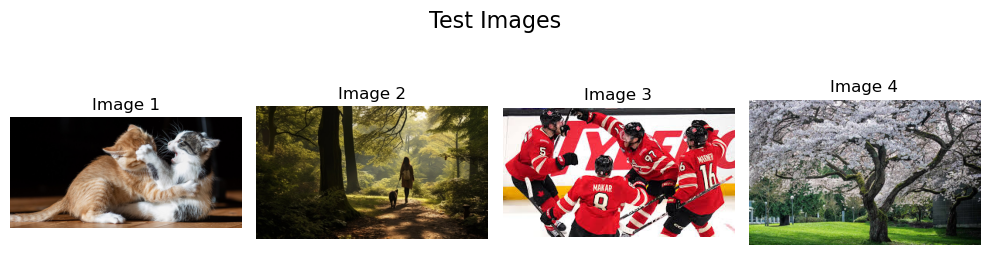

In [27]:
plt.figure(figsize=(10, 3))
for i, img in enumerate(original_images):
    ax = plt.subplot(1, len(original_images), i + 1)
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis("off")
plt.suptitle("Test Images", fontsize=16)
plt.tight_layout()
plt.show()

/Users/kvarada/MDS/2024-25/575/DSCI_575_adv-mach-learn_students/lectures/code/plotting_functions.py:44: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



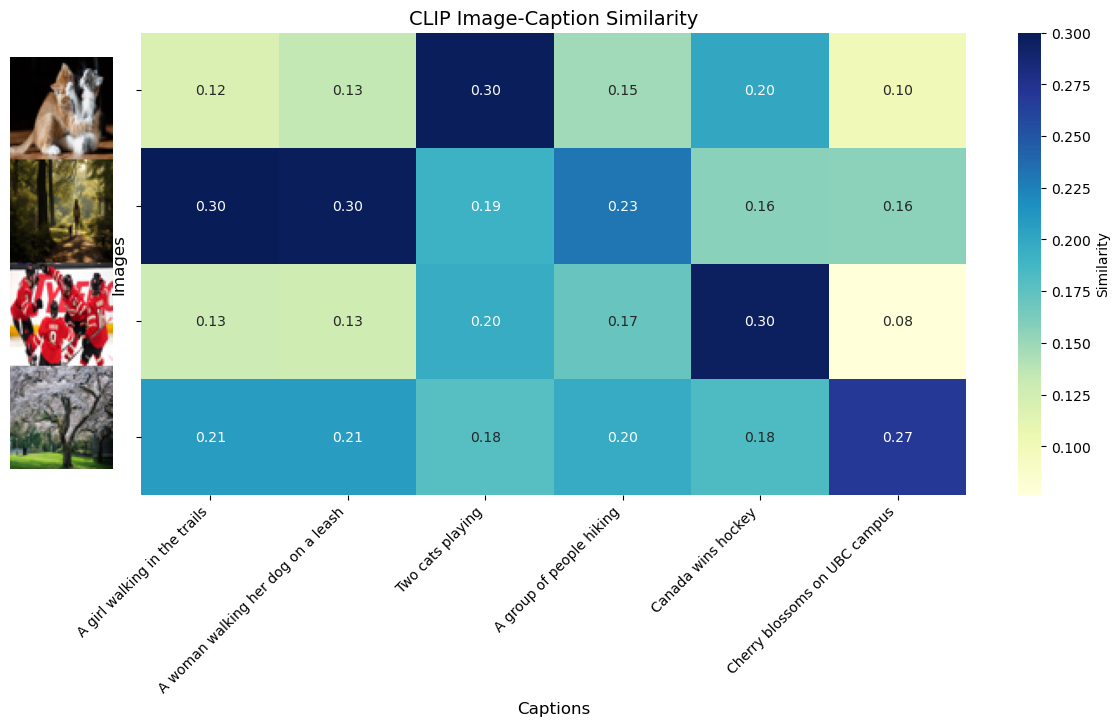

In [28]:
plot_img_caption_similarities(original_images, captions, similarity_np)

**Possible applications**
- Visual search
- Image captioning support

<br><br>

### 3.2 Retrieval-Augmented Generation (RAG)

**When LLMs fall short**

Suppose you ask a pre-trained LLM:

> **"How many quizzes am I allowed to miss in the MDS program?"**

Now imagine the policy for DSCI 575 changes next year - you're allowed to miss **one quiz**.

You ask the same question again **4 months later**.  
What will the LLM say?


**The problem**

Most LLMs are trained on a **fixed dataset** and have **no access to real-time or private data**.

As a result, they:
- May give **outdated answers**
- Can't reflect **new policies or updates**
- Lack grounding in **personal or organizational data**

This limits their usefulness in situations that require **factual, timely, or domain-specific information**.


**What do we *want* from LLMs?**

Imagine if an LLM could:
- Answer questions using **the latest documents or policies**
  
- Pull information from **your data**: emails, notes, internal files
- Provide **citations** so you can trust its sources

This would make an LLM much more useful in applications such as:
- Customer support with internal documentation
  
- Research assistants trained on your own papers  
- Legal/medical QA from private or sensitive records

Enter **Retrieval-Augmented Generation (RAG)!**


RAG bridges the gap between **LLMs and external knowledge**.

![](../img/RAG-architecture.png)
[Source](https://web.stanford.edu/~jurafsky/slp3/14.pdf)

Here's how it works:

1. Use **retrieval** to fetch relevant documents from a collection  
2. Use an **LLM** to generate an answer **conditioned on those documents**

This approach helps:
- Reduce hallucinations
- Provide source-grounded answers
- Adapt to **changing or private knowledge**

A typical prompt looks like this:

![](../img/RAG-prompt.png)

[Source](https://web.stanford.edu/~jurafsky/slp3/14.pdf)

Though conceptually simple, building a real RAG system involves many design choices at each stage.

Here are some key design questions in a RAG System. 

**Retriever-related:**

- How should documents be chunked?
  
- How do we encode documents and queries?
- What retrieval method should we use (dense, sparse, hybrid)?
- How many passages should we retrieve?
- Should we retrieve once or in multiple stages?

**Context handling & evaluation:**
- How do we pass retrieved context to the model?
  
- How do we evaluate accuracy, faithfulness, or relevance?

A popular framework for implementing RAG is [LangChain](https://python.langchain.com/api_reference/community/).  
LangChain provides modular components to handle retrieval, prompting, memory, evaluation, and more.

**Useful tools**
- [FAISS](https://github.com/facebookresearch/faiss])
    - Faiss is a library for efficient similarity search and clustering of dense vectors.
- [chromadb](https://github.com/chroma-core/chroma)

<br><br>

### 3.3 Harms of LLMs

While these models are super powerful and useful, be mindful of the harms caused by these models. Some of the harms as summarized [here](https://stanford-cs324.github.io/winter2022/lectures/harms-1/) are: 

- misinformation
  
- performance disparties
- social biases and stereotypes
- toxicity
- security and privacy risks
- copyright and legal protections
- environmental impact
- centralization of power

An important component of large language models that we haven't yet discussed is **Reinforcement Learning with Human Feedback (RLHF)**. 

**Summary**
- LLMs can be applied across many domains
  
- Hugging Face provides accessible tools to get started
- CLIP and RAG are powerful for multimodal and retrieval-based tasks
- Think creatively about applying these tools in your Capstone!
Evaluation and Safety
- Beware of hallucinations
- Use prompts and grounding to improve factuality


<br><br>

## Course summary and wrap up 

### Week 1 ✅

- Markov models, language models, text generation 

![](../img/Markov_autocompletion.png)

<!-- <center> -->
<!-- <img src="img/Markov_autocompletion.png" height="800" width="800">  -->
<!-- </center>     -->
    

### Applications of Markov models

![](../img/Markov_chain_applications.png)

<!-- <center> -->
<!-- <img src="img/Markov_chain_applications.png" width="500" height="500"> -->
<!-- </center>     -->
    

### Week 2 ✅

- Hidden Markov models, speech recognition, POS tagging

![](../img/hmm_eks.gif)

<!-- <center> -->
<!-- <img src="img/hmm_eks.gif" height="800" width="800"> -->
<!-- </center> -->

    

### Week 3 ✅

- RNNs
- Self-attention 

![](../img/transformers-multi-layer-LM.png)

### Week 4 ✅

- More transformers 

![](../img/image-captioning-overview.png)

![](../img/eva-accomplished.png)

### Final remarks 

That's all! I really enjoyed teaching you this complex material. I know it was challenging, and all those matrices probably made your head hurt, but a bit of pain is often part of the learning process. I hope you found it rewarding to learn these advanced concepts which are at the core of LLMs.

I very much appreciate your support, patience, and great questions ♥️!   

I wish you every success in your job search. Stay in touch!

<br><br><br><br>